In [1]:
from qiskit.test.mock import FakeCambridge
backend = FakeCambridge()

In [2]:
from qiskit.tools.jupyter import backend_overview

In [3]:
backend

<FakeCambridge('fake_cambridge')>

In [4]:
props = backend.properties()

In [5]:
for i in range(backend.configuration().n_qubits):
    print('The U gate have lenght',props.gate_length('u3',i)*1e9,'nanosecs')

The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 104.3478260

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

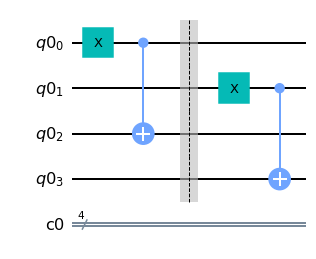

In [7]:
qc.x(q[0])
qc.cx(q[0],q[2])
qc.barrier()
qc.x(q[1])
qc.cx(q[1],q[3])
qc.draw('mpl')

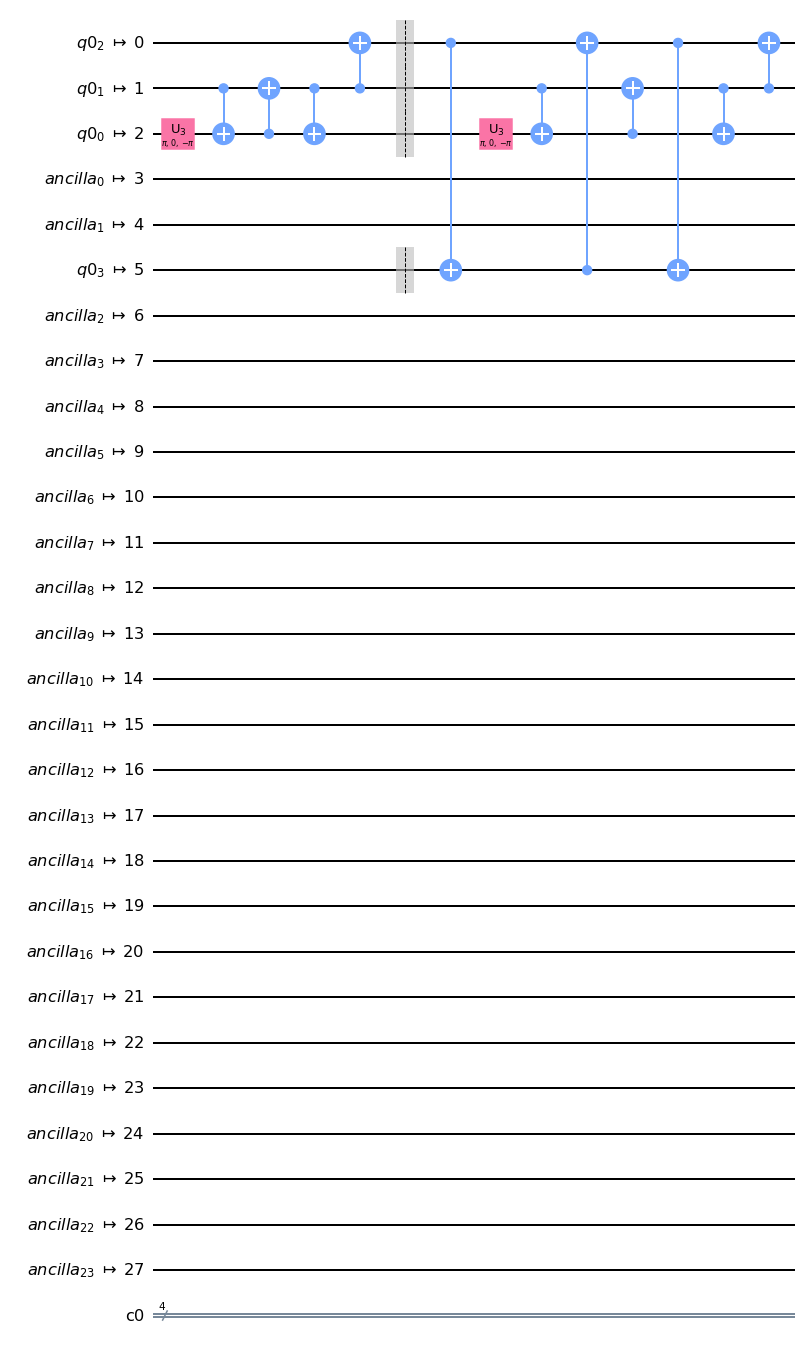

In [8]:
from qiskit import transpile
qc_compiled = transpile(qc,backend)
qc_compiled.draw('mpl')

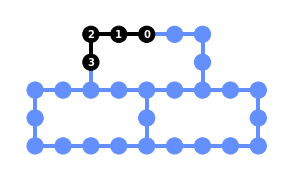

In [9]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_compiled,backend)

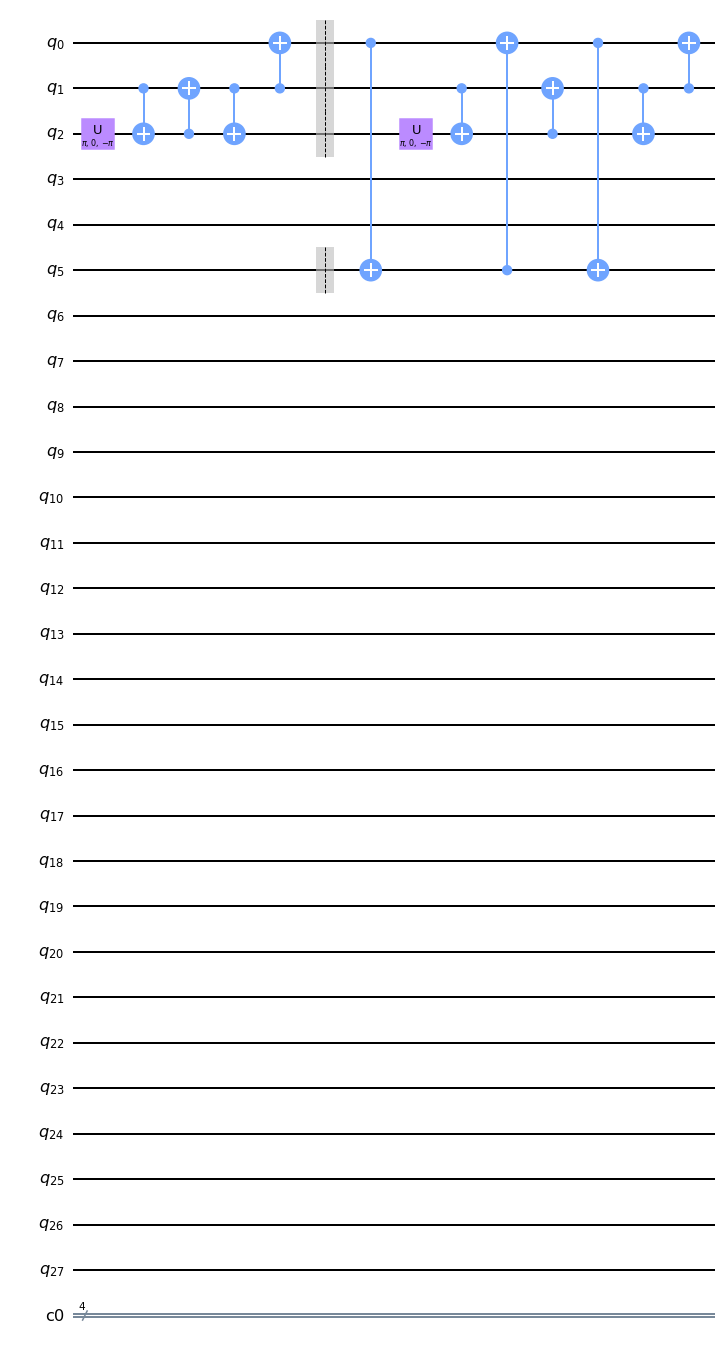

In [10]:
qc_compiled.decompose().draw('mpl')

In [11]:
qc_manually_compiled = transpile(qc,backend,initial_layout=[3,4,1,0])

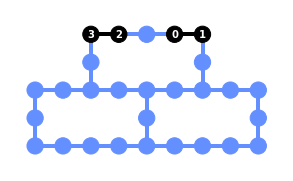

In [12]:
plot_circuit_layout(qc_manually_compiled,backend)

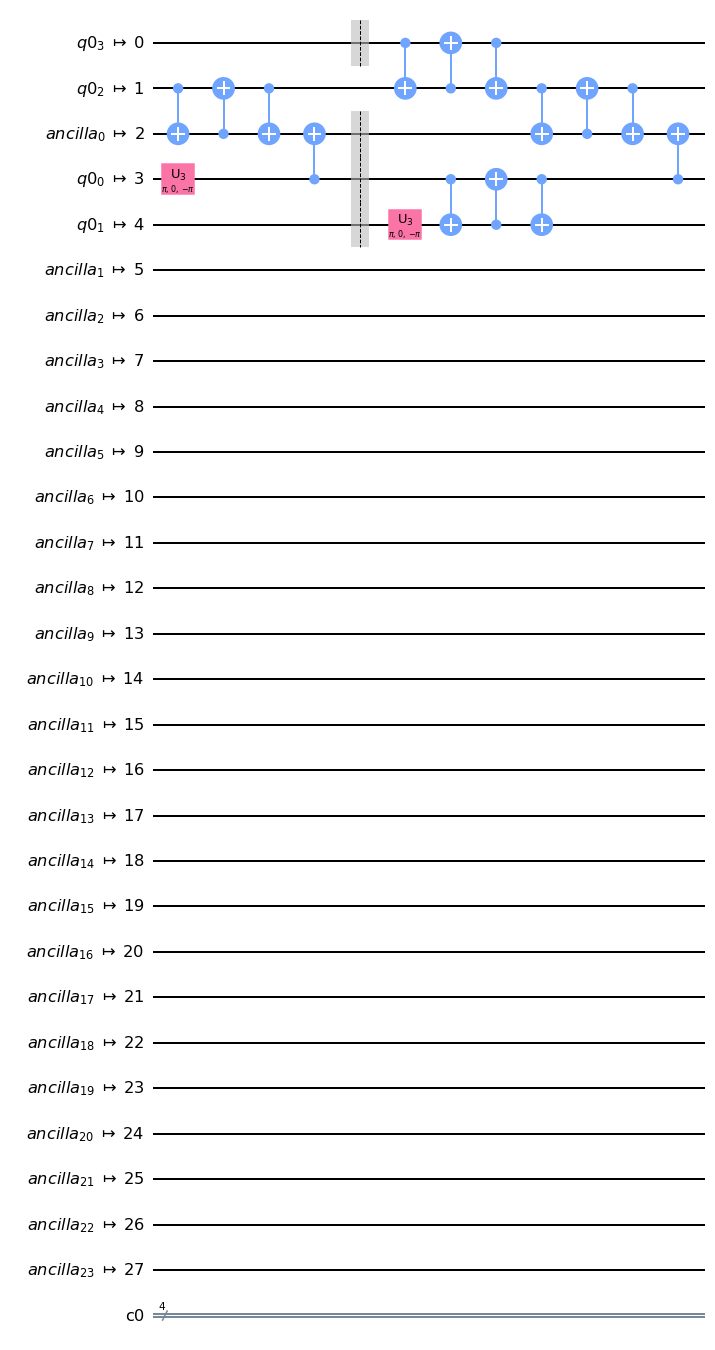

In [13]:
qc_manually_compiled.draw('mpl')

In [14]:
qc_compiled.depth()

10

In [15]:
qc_manually_compiled.depth()

11

In [16]:
for i in range(4):
    qc_compiled_optimization = transpile(qc,backend,optimization_level=i)
    print('Optimization level',i)
    print('Depth',qc_compiled_optimization.depth())
    print('Gate counts',qc_compiled_optimization.count_ops())

Optimization level 0
Depth 6
Gate counts OrderedDict([('cx', 5), ('u3', 2), ('barrier', 1)])
Optimization level 1
Depth 6
Gate counts OrderedDict([('cx', 5), ('u3', 2), ('barrier', 1)])
Optimization level 2
Depth 4
Gate counts OrderedDict([('u3', 2), ('cx', 2), ('barrier', 1)])
Optimization level 3
Depth 4
Gate counts OrderedDict([('u3', 2), ('cx', 2), ('barrier', 1)])


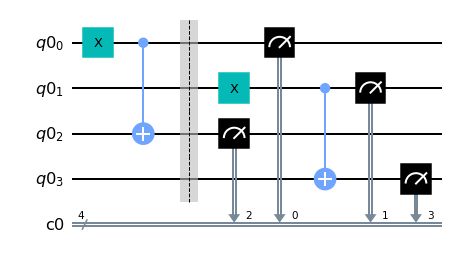

In [17]:
for i in range(4):
    qc.measure(q[i],c[i])
qc.draw('mpl')

In [18]:
qc0 = transpile(qc,backend,optimization_level=0)
qc1 = transpile(qc,backend,optimization_level=1)
qc2 = transpile(qc,backend,optimization_level=2)
qc3 = transpile(qc,backend,optimization_level=3)

In [19]:
qc_list = [qc0,qc1,qc2,qc3]
job = backend.run(qc_list,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'1001': 8, '0010': 8, '1000': 4, '0001': 9, '0110': 7, '0100': 19, '1011': 63, '1010': 31, '1111': 601, '0101': 22, '1100': 18, '1101': 108, '0011': 18, '0111': 47, '0000': 13, '1110': 48}, {'0010': 1, '1001': 9, '0110': 8, '1110': 47, '0001': 2, '1010': 17, '1111': 671, '1101': 26, '0000': 1, '0111': 66, '0011': 18, '1011': 137, '0101': 15, '1100': 6}, {'0010': 1, '1100': 8, '0101': 18, '1001': 9, '1011': 36, '1010': 9, '1111': 708, '0011': 2, '0111': 83, '1101': 117, '0100': 1, '0110': 5, '1110': 27}, {'0010': 1, '0110': 1, '0100': 1, '1000': 1, '0001': 2, '1001': 10, '0011': 13, '0111': 46, '1010': 17, '1111': 665, '1011': 133, '1101': 56, '1100': 3, '0101': 7, '1110': 68}]


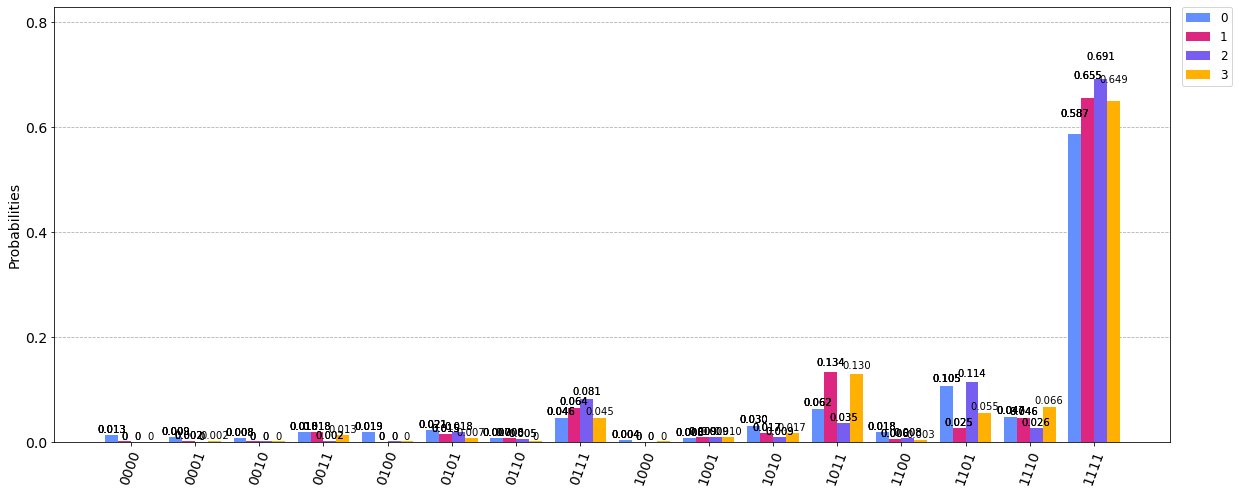

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8),legend=['0','1','2','3'])